<a href="https://colab.research.google.com/github/pk18singh/Flat_Prediction_Model/blob/main/outlier_treatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('properties_cleaned_v2.csv').drop_duplicates()

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 81,0.89,8127.0,1095.0,Built Up area: 1095 (101.73 sq.m.),1,1,0,1.0,NaN,Undefined,NaN,1095.0,NaN,0,0,0,0,0,0,0
1,flat,central park flower valley,sector 33,1.35,10384.0,1300.0,Carpet area: 1300 (120.77 sq.m.),3,2,2,3.0,West,New Property,NaN,NaN,1300.0,0,0,0,0,0,0,87
2,flat,guru gram haryana cghs,sector 56,1.39,8424.0,1650.0,Super Built up area 1850(171.87 sq.m.)Built Up...,3,2,3,6.0,South,Old Property,1850.0,1750.0,1650.0,0,1,0,1,0,2,89
3,flat,emaar mgf emerald floors premier,sector 65,3.00,15189.0,1975.0,Super Built up area 1975(183.48 sq.m.),4,4,3+,2.0,South-East,Relatively New,1975.0,NaN,NaN,0,1,0,0,0,0,87
4,house,independent,manesar,2.00,14954.0,1337.0,Plot area 1337.4(124.25 sq.m.),3,1,0,3.0,North,Moderately Old,NaN,1337.4,NaN,0,0,0,0,0,0,16


In [5]:
df.shape

(3677, 23)

In [6]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

<ipython-input-10-8b1da2b57040>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


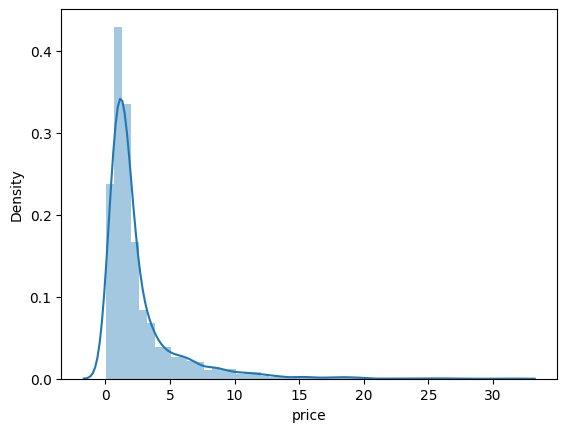

In [10]:
# outliers on the basis of price column
sns.distplot(df['price'])
plt.show()

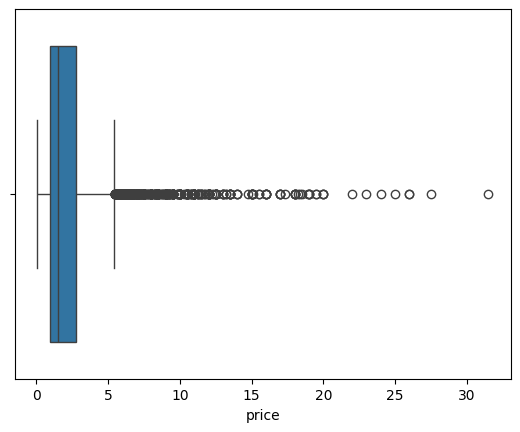

In [11]:
sns.boxplot(x=df['price'])
plt.show()

In [18]:
# Calculate the IQR for the 'price' column

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

# Define bounds for outliers

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower) | (df['price'] > upper)]

In [17]:
# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]

In [20]:
outliers_price_stats = outliers['price'].describe()

In [21]:
num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [22]:
outliers.sort_values('price', ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1720,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,1,74
606,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,2,42
2032,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,2,138
2216,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,1,72
291,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0
3111,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,2,122
295,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,2,145
3400,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,0,54
3215,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,2,153
2430,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,2,31


On the basis of price col we can say that there are some genuine outliers but there are some data erros as well


**Price_per_sqft**

<ipython-input-23-c5c55514795d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


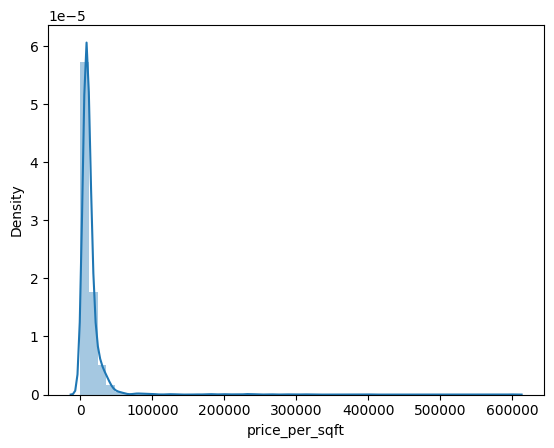

In [23]:
sns.distplot(df['price_per_sqft'])
plt.show()

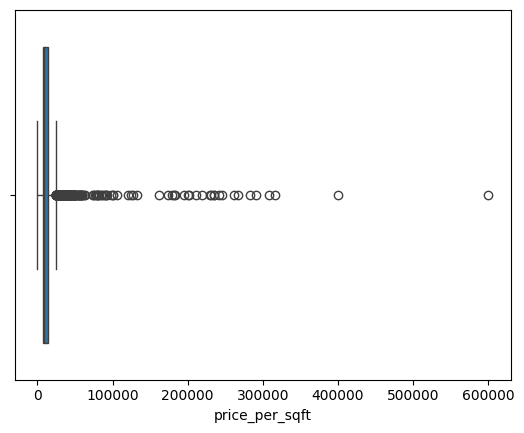

In [24]:
sns.boxplot(x=df['price_per_sqft'])
plt.show()

In [29]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_sqft  = df[(df['price_per_sqft'] < lower) | (df['price_per_sqft'] > upper)]

In [30]:
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

In [31]:
num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [32]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x < 1000 else x)

<ipython-input-32-9c4d234f4e89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x < 1000 else x)


In [33]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

<ipython-input-33-f07934424e06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [34]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [35]:
df.update(outliers_sqft)

<ipython-input-36-c5c55514795d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


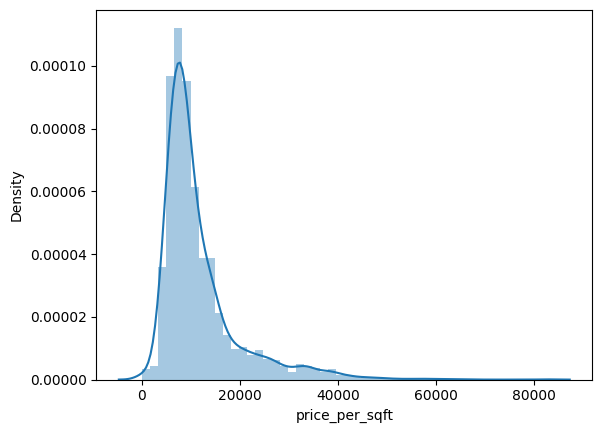

In [36]:
sns.distplot(df['price_per_sqft'])
plt.show()

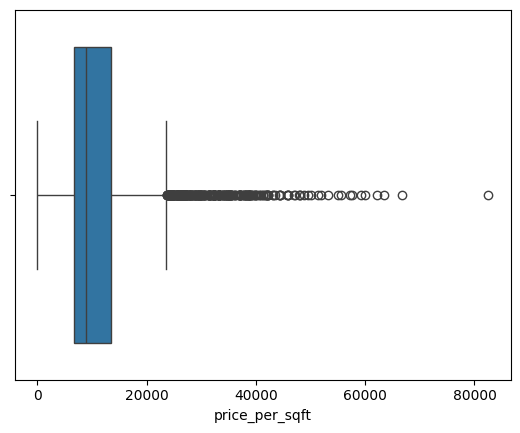

In [38]:
sns.boxplot(x = df['price_per_sqft'])
plt.show()

In [39]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
144,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3.0,3.0,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2032,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6.0,7.0,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,138.0
2058,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2.0,1.0,0,1.0,NaN,Undefined,NaN,140.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2216,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16.0,3+,4.0,North-West,New Property,NaN,400.0,350.0,1.0,1.0,1.0,1.0,0.0,1.0,72.0
2385,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12.0,12.0,3+,4.0,North,New Property,NaN,1600.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,99.0
2402,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4.0,5.0,3+,2.0,North,Old Property,NaN,2250.0,NaN,1.0,1.0,0.0,0.0,0.0,2.0,160.0
2491,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4.0,4.0,3,2.0,North,Relatively New,NaN,250.0,200.0,1.0,1.0,1.0,1.0,0.0,2.0,103.0
2687,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4.0,4.0,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1.0,1.0,0.0,1.0,0.0,1.0,75.0
3111,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5.0,5.0,2,1.0,North-East,Old Property,NaN,400.0,NaN,1.0,1.0,0.0,1.0,0.0,2.0,122.0
3166,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3.0,3.0,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df = df[df['price_per_sqft'] <= 50000]

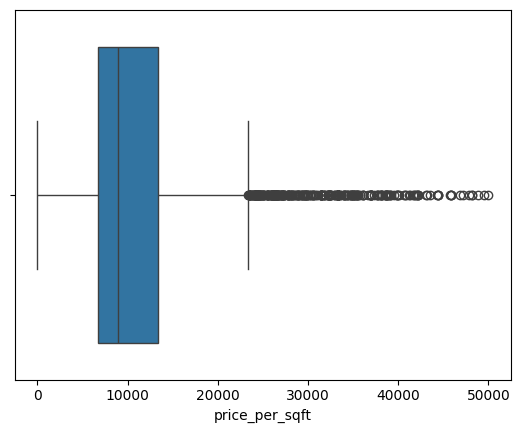

In [41]:
sns.boxplot(x=df['price_per_sqft'])
plt.show()

**Area**

<ipython-input-42-e5ab9fb1aa45>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


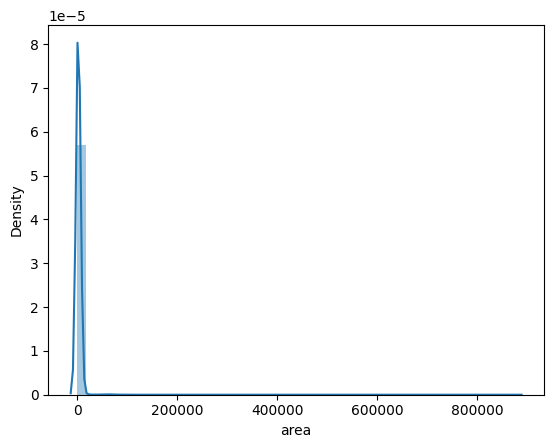

In [42]:
sns.distplot(df['area'])
plt.show()

<Axes: xlabel='area'>

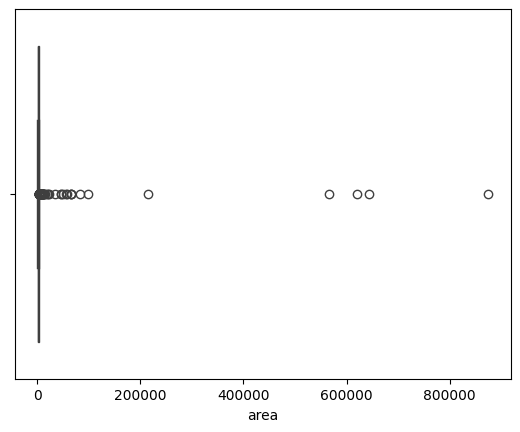

In [43]:
sns.boxplot(x=df['area'])


In [44]:
df['area'].describe()

count      3647.000000
mean       2947.723608
std       23208.194102
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [45]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
312,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,44.0
892,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6.0,5.0,3+,2.0,NaN,New Property,NaN,2.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,0.0
2485,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1.0,0.0,0.0,0.0,1.0,0.0,65.0
2584,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,2.0,South-West,New Property,NaN,NaN,569243.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0
3428,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,3.0,North,New Property,NaN,NaN,514396.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0


In [46]:
df = df[df['area'] < 100000]

<ipython-input-47-e5ab9fb1aa45>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


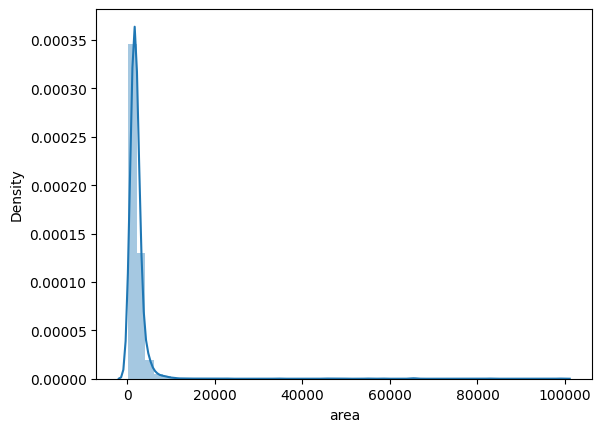

In [47]:
sns.distplot(df['area'])
plt.show()

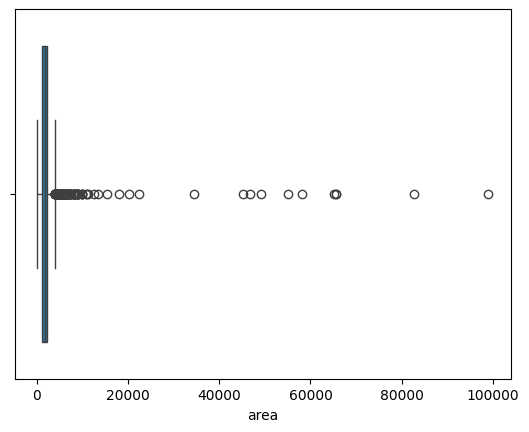

In [48]:
sns.boxplot(x=df['area'])
plt.show()

In [53]:
df[df['area'] > 10000].sort_values('area',ascending=False).head(20)

# 3448, 2325, 2135, 884, 679, 2701, 1952, 2209, 3081

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3448,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0.0,1.0,1.0,1.0,0.0,2.0,60.0
1026,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,7.0
2325,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.00,0.0,0.0,0.0,0.0,0.0,0.0,51.0
2135,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.00,1.0,0.0,0.0,0.0,0.0,0.0,15.0
2025,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
884,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0.0,0.0,0.0,0.0,0.0,0.0,15.0
679,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0.0,0.0,0.0,0.0,0.0,0.0,37.0
2701,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1.0,0.0,0.0,0.0,0.0,0.0,37.0
1352,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0.0,1.0,1.0,0.0,0.0,2.0,109.0
1952,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0.0,0.0,0.0,0.0,1.0,0.0,33.0


In [54]:
df.drop(index=[3448, 2325, 2135, 884, 679, 2701, 1952, 2209, 3081], inplace=True)

In [55]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1026,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,7.0
2025,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1352,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0.0,1.0,1.0,0.0,0.0,2.0,109.0
275,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9.0,9.0,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,0.0,1.0,0.0,0.0,0.0,2.0,61.0
2581,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8.0,7.0,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1.0,1.0,0.0,1.0,1.0,2.0,123.0
2607,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Undefined,NaN,NaN,18122.00,1.0,0.0,0.0,1.0,1.0,2.0,44.0
2993,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3.0,3.0,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0.0,1.0,0.0,0.0,0.0,0.0,160.0
2736,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3.0,3.0,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0.0,0.0,0.0,0.0,0.0,0.0,55.0
606,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,42.0
853,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.00,0.0,1.0,0.0,0.0,0.0,0.0,60.0


In [56]:
df.loc[1026,'area'] = 115*9
df.loc[2025,'area'] = 7250
df.loc[1352,'area'] = 5800
df.loc[275,'area'] = 2660
df.loc[2581,'area'] = 2850
df.loc[2607,'area'] = 1812
df.loc[2993,'area'] = 2160
df.loc[2736,'area'] = 1175

<ipython-input-57-e5ab9fb1aa45>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


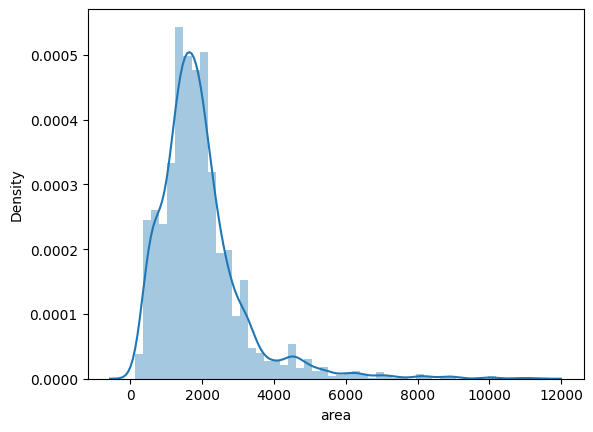

In [57]:
sns.distplot(df['area'])
plt.show()

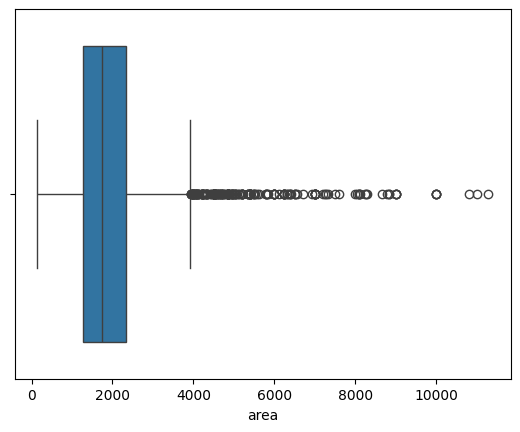

In [58]:
sns.boxplot(x=df['area'])
plt.show()

In [59]:
df['area'].describe()

count     3633.000000
mean      1950.357005
std       1215.707897
min        145.000000
25%       1260.000000
50%       1747.000000
75%       2325.000000
max      11286.000000
Name: area, dtype: float64

**Bedroom**

<ipython-input-60-fb07e5227aaf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


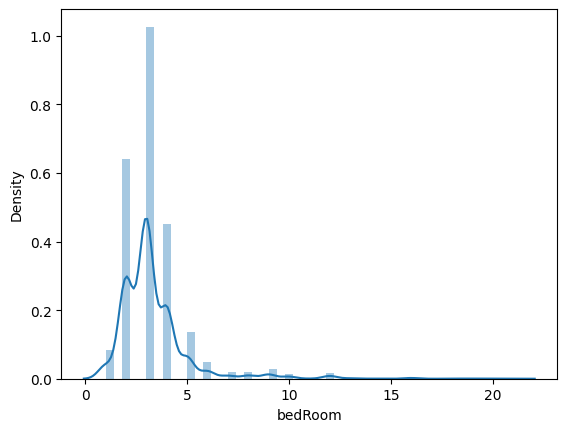

In [60]:
sns.distplot(df['bedRoom'])
plt.show()

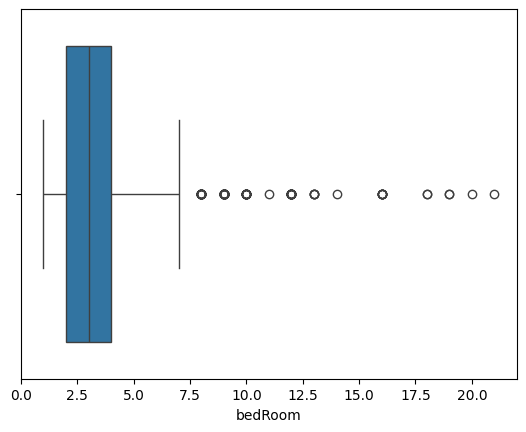

In [61]:
sns.boxplot(x=df['bedRoom'])
plt.show()

In [62]:
df['bedRoom'].describe()

count    3633.000000
mean        3.333609
std         1.830035
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [63]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1306,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21.0,21.0,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,49.0
113,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20.0,20.0,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,22.0
1289,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19.0,17.0,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,74.0
766,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19.0,17.0,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,68.0
3601,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18.0,18.0,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,57.0
1302,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18.0,18.0,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,70.0
2177,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,3078.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,0.0
2430,house,luxury dlf city floors,sector 26,20.00,48888.0,4091.0,Plot area 500(418.06 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,500.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,31.0
2725,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,2,4.0,West,New Property,NaN,2700.0,NaN,0.0,1.0,0.0,1.0,0.0,2.0,49.0
3215,house,dlf city plots,sector 26,20.00,44267.0,4518.0,Plot area 502(419.74 sq.m.),16.0,20.0,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,153.0


In [64]:
df = df[df['bedRoom'] <= 10]

In [65]:
df.shape

(3588, 23)

<ipython-input-66-fb07e5227aaf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


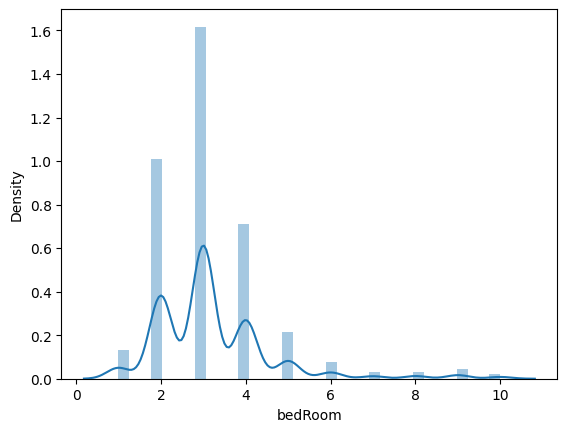

In [66]:
sns.distplot(df['bedRoom'])
plt.show()

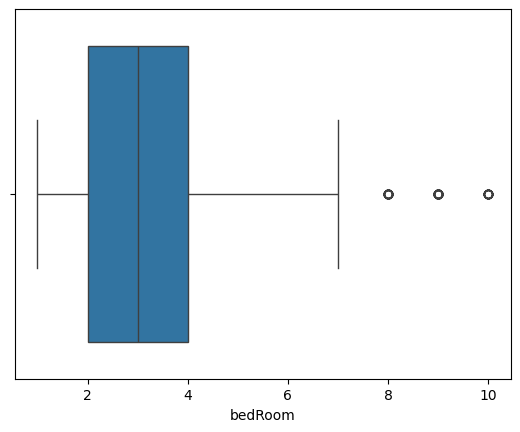

In [67]:
sns.boxplot(x=df['bedRoom'])
plt.show()

In [68]:
df['bedRoom'].describe()

count    3588.000000
mean        3.203735
std         1.393968
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

**Bathroom**

<ipython-input-69-9719777c7423>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


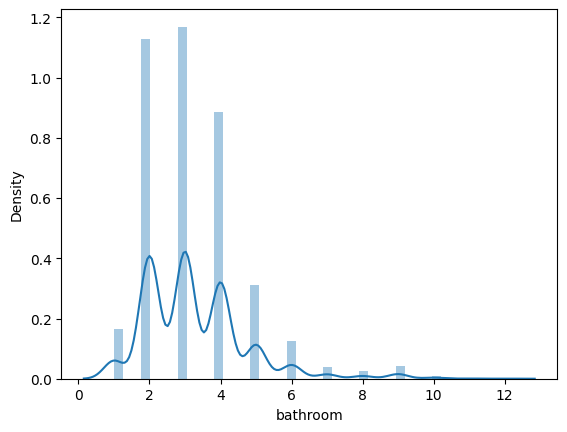

In [69]:
sns.distplot(df['bathroom'])
plt.show()

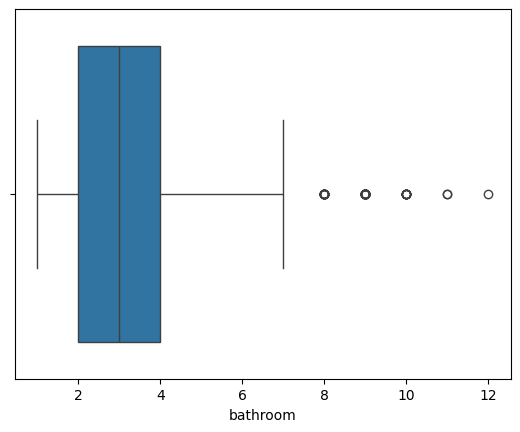

In [70]:
sns.boxplot(x=df['bathroom'])
plt.show()

In [71]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
250,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,146.0
939,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,3.0,East,Old Property,NaN,5000.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,39.0
3704,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11.0,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,38.0


In [72]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 81,0.89,8127.0,1095.0,Built Up area: 1095 (101.73 sq.m.),1.0,1.0,0,1.0,NaN,Undefined,NaN,1095.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,flat,central park flower valley,sector 33,1.35,10384.0,1300.0,Carpet area: 1300 (120.77 sq.m.),3.0,2.0,2,3.0,West,New Property,NaN,NaN,1300.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0
2,flat,guru gram haryana cghs,sector 56,1.39,8424.0,1650.0,Super Built up area 1850(171.87 sq.m.)Built Up...,3.0,2.0,3,6.0,South,Old Property,1850.0,1750.0,1650.0,0.0,1.0,0.0,1.0,0.0,2.0,89.0
3,flat,emaar mgf emerald floors premier,sector 65,3.00,15189.0,1975.0,Super Built up area 1975(183.48 sq.m.),4.0,4.0,3+,2.0,South-East,Relatively New,1975.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,87.0
4,house,independent,manesar,2.00,14954.0,1337.0,Plot area 1337.4(124.25 sq.m.),3.0,1.0,0,3.0,North,Moderately Old,NaN,1337.4,NaN,0.0,0.0,0.0,0.0,0.0,0.0,16.0


**Super built up area**


<ipython-input-73-ad14b63d9a41>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


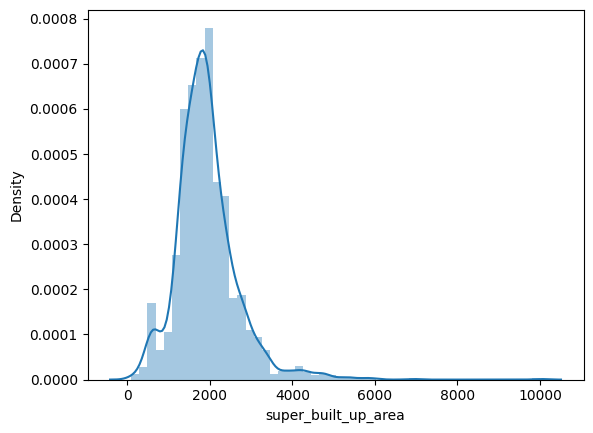

In [73]:
sns.distplot(df['super_built_up_area'])
plt.show()

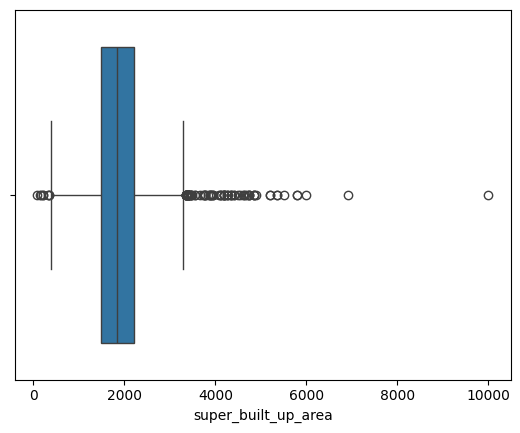

In [74]:
sns.boxplot(x=df['super_built_up_area'])
plt.show()

In [75]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [76]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
118,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,2.0,140.0
123,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,0.0,49.0


**Built up area**

<ipython-input-77-9d4b3f8503dc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


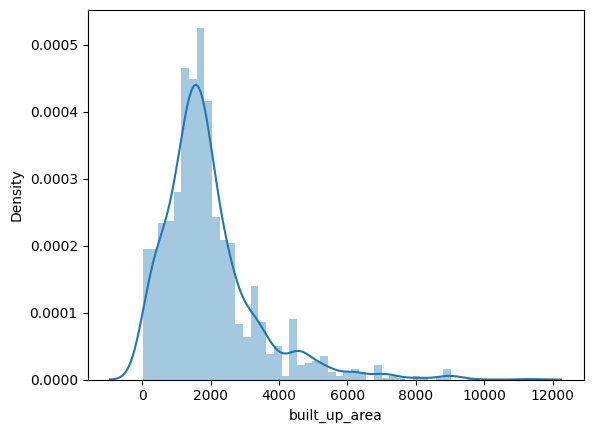

In [77]:
sns.distplot(df['built_up_area'])
plt.show()

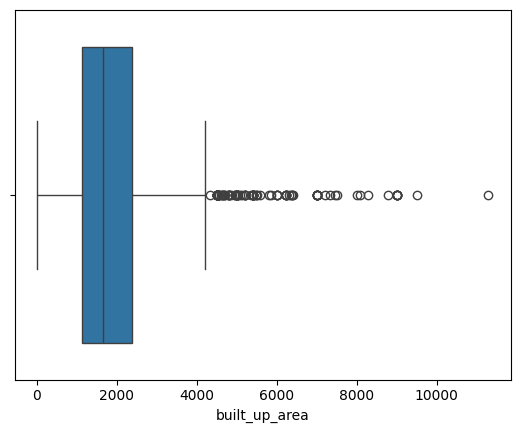

In [78]:
sns.boxplot(x=df['built_up_area'])
plt.show()

In [79]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
606,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,42.0


**Carpet area**

<ipython-input-80-5e45aa99355d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


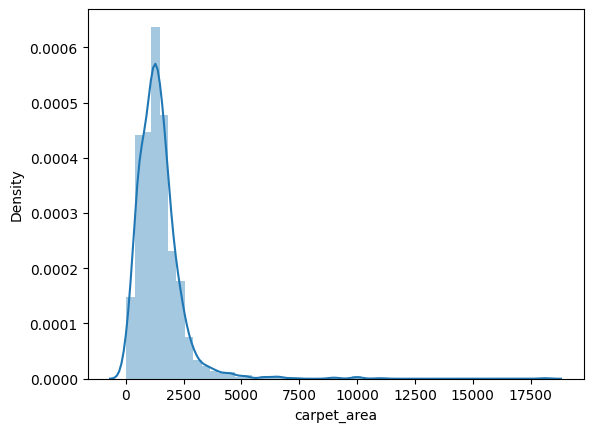

In [80]:
sns.distplot(df['carpet_area'])
plt.show()

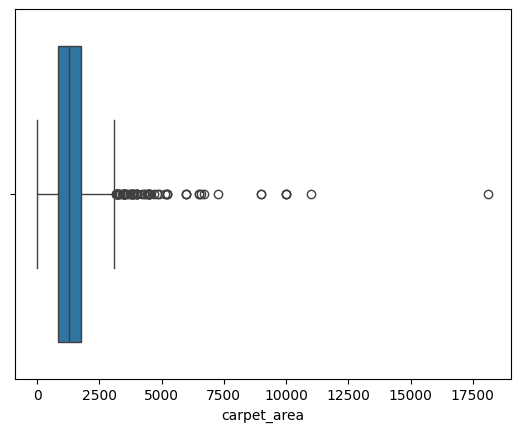

In [81]:
sns.boxplot(x=df['carpet_area'])
plt.show()

In [82]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
853,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0.0,1.0,0.0,0.0,0.0,0.0,60.0
2607,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Undefined,NaN,NaN,18122.0,1.0,0.0,0.0,1.0,1.0,2.0,44.0


In [83]:
df.loc[2607,'carpet_area'] = 1812

In [84]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
853,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0.0,1.0,0.0,0.0,0.0,0.0,60.0


In [85]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 81,0.89,8127.0,1095.0,Built Up area: 1095 (101.73 sq.m.),1.0,1.0,0,1.0,NaN,Undefined,NaN,1095.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,flat,central park flower valley,sector 33,1.35,10384.0,1300.0,Carpet area: 1300 (120.77 sq.m.),3.0,2.0,2,3.0,West,New Property,NaN,NaN,1300.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0
2,flat,guru gram haryana cghs,sector 56,1.39,8424.0,1650.0,Super Built up area 1850(171.87 sq.m.)Built Up...,3.0,2.0,3,6.0,South,Old Property,1850.0,1750.0,1650.0,0.0,1.0,0.0,1.0,0.0,2.0,89.0
3,flat,emaar mgf emerald floors premier,sector 65,3.00,15189.0,1975.0,Super Built up area 1975(183.48 sq.m.),4.0,4.0,3+,2.0,South-East,Relatively New,1975.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,87.0
4,house,independent,manesar,2.00,14954.0,1337.0,Plot area 1337.4(124.25 sq.m.),3.0,1.0,0,3.0,North,Moderately Old,NaN,1337.4,NaN,0.0,0.0,0.0,0.0,0.0,0.0,16.0


<ipython-input-86-8c7b5ba537f9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


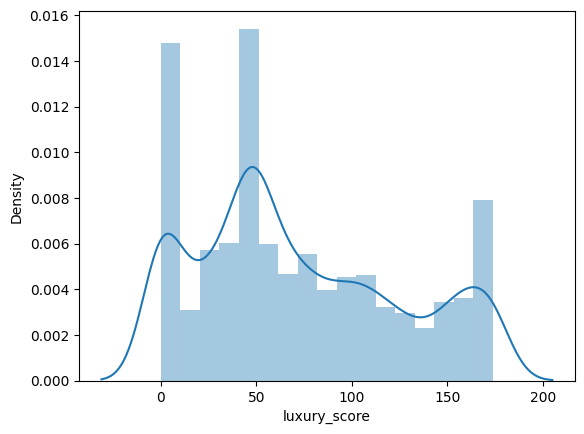

In [86]:
sns.distplot(df['luxury_score'])
plt.show()

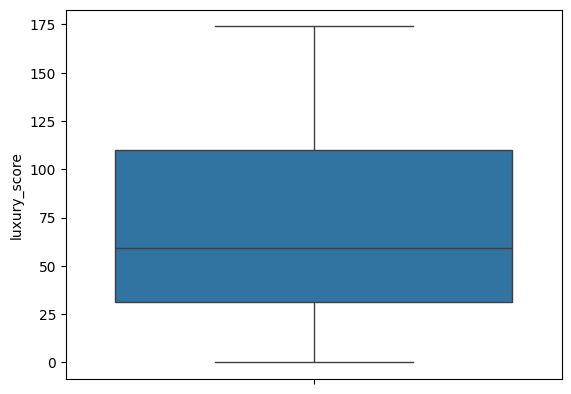

In [87]:
sns.boxplot(df['luxury_score'])
plt.show()

In [88]:
df.shape

(3588, 23)

In [89]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [90]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 81,0.89,8128.0,1095.0,Built Up area: 1095 (101.73 sq.m.),1.0,1.0,0,1.0,NaN,Undefined,NaN,1095.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,flat,central park flower valley,sector 33,1.35,10385.0,1300.0,Carpet area: 1300 (120.77 sq.m.),3.0,2.0,2,3.0,West,New Property,NaN,NaN,1300.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0
2,flat,guru gram haryana cghs,sector 56,1.39,8424.0,1650.0,Super Built up area 1850(171.87 sq.m.)Built Up...,3.0,2.0,3,6.0,South,Old Property,1850.0,1750.0,1650.0,0.0,1.0,0.0,1.0,0.0,2.0,89.0
3,flat,emaar mgf emerald floors premier,sector 65,3.00,15190.0,1975.0,Super Built up area 1975(183.48 sq.m.),4.0,4.0,3+,2.0,South-East,Relatively New,1975.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,87.0
4,house,independent,manesar,2.00,14959.0,1337.0,Plot area 1337.4(124.25 sq.m.),3.0,1.0,0,3.0,North,Moderately Old,NaN,1337.4,NaN,0.0,0.0,0.0,0.0,0.0,0.0,16.0


<ipython-input-91-c5c55514795d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


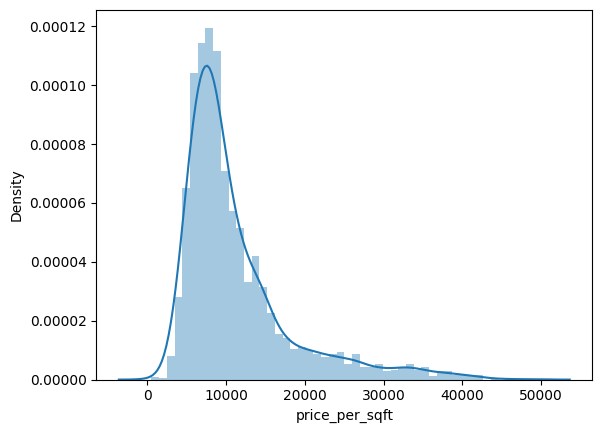

In [91]:
sns.distplot(df['price_per_sqft'])
plt.show()

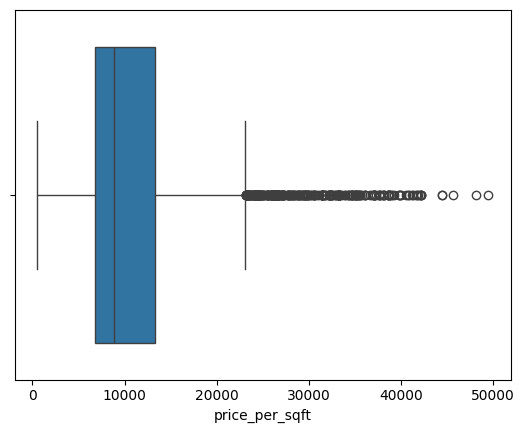

In [93]:
sns.boxplot(x = df['price_per_sqft'])
plt.show()

In [94]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
536,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0.0,1.0,1.0,1.0,0.0,2.0,60.0
575,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.0,0.0,0.0,0.0,0.0,1.0,2.0,44.0
813,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0.0,1.0,0.0,1.0,0.0,1.0,97.0
1626,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,4.0,North,New Property,NaN,2700.0,NaN,0.0,0.0,0.0,1.0,0.0,2.0,7.0
1768,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,3.0,North,Undefined,NaN,2000.0,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6.0,3,2.0,East,Relatively New,NaN,4518.0,NaN,1.0,1.0,0.0,0.0,0.0,2.0,121.0
3049,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0.0,1.0,0.0,1.0,0.0,2.0,88.0
3567,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8.0,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3716,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,103.0


In [100]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

250.5

In [101]:
df[(df['area']/df['bedRoom'])<250].shape[0]

185

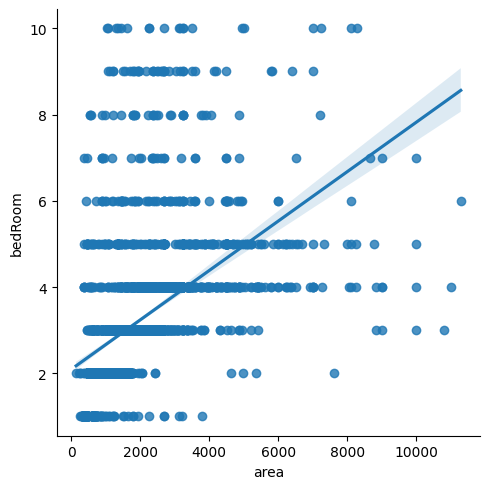

In [102]:
sns.lmplot(data = df, x = 'area', y = 'bedRoom')
plt.show()

In [103]:
df['area_room_ratio'] = df['area'] / df['bedRoom']

In [107]:
(df[df['area_room_ratio'] < 250])['bedRoom'].value_counts()

2.0     47
3.0     33
5.0     28
4.0     17
6.0     17
9.0     15
8.0     12
10.0     8
7.0      8
Name: bedRoom, dtype: int64

In [108]:
df = df[df['area_room_ratio'] > 100]

In [110]:
outliers_df = df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 3)]

In [111]:
outliers_df['bedRoom'] = round(outliers_df['bedRoom'] / df['floorNum'])

<ipython-input-111-363a884b2771>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom'] = round(outliers_df['bedRoom'] / df['floorNum'])


In [112]:
df.update(outliers_df)

In [113]:
df['area_room_ratio'] = df['area'] / df['bedRoom']

In [114]:
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
173,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5.0,4.0,2,1.0,East,Undefined,NaN,1100.0,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,220.000000
407,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5.0,4.0,2,1.0,North-East,Undefined,NaN,NaN,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,198.000000
519,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10.0,7.0,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,0.0,225.000000
685,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6.0,4.0,1,1.0,South-West,Undefined,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.000000
986,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6.0,2.0,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166.666667
996,house,independent,sector 3 phase 2,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5.0,3.0,3,1.0,NaN,Undefined,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.000000
1181,house,independent,manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8.0,8.0,0,1.0,NaN,New Property,NaN,1782.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,222.750000
1590,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9.0,5.0,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,8.0,200.000000
2220,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9.0,4.0,3,1.0,South,Undefined,NaN,NaN,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.000000
3198,house,independent,manesar,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8.0,8.0,2,1.0,NaN,Relatively New,NaN,1200.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.000000


In [116]:
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)].shape

(13, 24)

In [117]:
df.shape

(3568, 24)

In [118]:
df = df[~((df['area_room_ratio'] < 250) & (df['bedRoom'] > 4))]

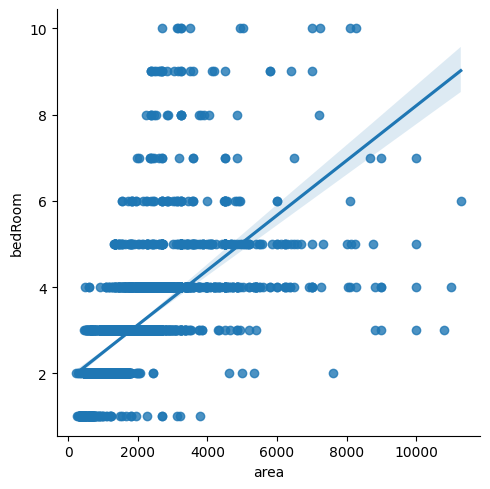

In [119]:
sns.lmplot(data = df, x = 'area', y = 'bedRoom')
plt.show()

In [120]:
df.shape

(3555, 24)

In [121]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,house,independent,sector 81,0.89,8128.0,1095.0,Built Up area: 1095 (101.73 sq.m.),1.0,1.0,0,1.0,NaN,Undefined,NaN,1095.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1095.000000
1,flat,central park flower valley,sector 33,1.35,10385.0,1300.0,Carpet area: 1300 (120.77 sq.m.),3.0,2.0,2,3.0,West,New Property,NaN,NaN,1300.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,433.333333
2,flat,guru gram haryana cghs,sector 56,1.39,8424.0,1650.0,Super Built up area 1850(171.87 sq.m.)Built Up...,3.0,2.0,3,6.0,South,Old Property,1850.0,1750.0,1650.0,0.0,1.0,0.0,1.0,0.0,2.0,89.0,550.000000
3,flat,emaar mgf emerald floors premier,sector 65,3.00,15190.0,1975.0,Super Built up area 1975(183.48 sq.m.),4.0,4.0,3+,2.0,South-East,Relatively New,1975.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,87.0,493.750000
4,house,independent,manesar,2.00,14959.0,1337.0,Plot area 1337.4(124.25 sq.m.),3.0,1.0,0,3.0,North,Moderately Old,NaN,1337.4,NaN,0.0,0.0,0.0,0.0,0.0,0.0,16.0,445.666667


In [122]:
df.to_csv('properties_outlier_treated.csv', index=False)